In [1]:
import sys
import os
os.chdir(r'..')

import numpy as np
import pandas as pd
import scipy.stats as st
import networkx as nx
import scipy as sp 
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 300
import seaborn as sns
import matplotlib.cm as cm

import hickle

sys.path.append(os.getcwd() + '/outputs')
sys.path.append(os.getcwd() + '/functions')
sys.path.append(os.getcwd() + '/data')


import vaccination as vacc
import vaccination as iv
import models
import transnet
import data_loader as dl
import plotting as pl


%matplotlib inline

/Users/jmunday/Documents/Measles_NL


In [2]:
inc_nodes = np.intersect1d(transnet.nodes, transnet.school_data.BRIN)

In [3]:
import importlib as imp
imp.reload(iv)

<module 'vaccination' from '/Users/jmunday/Documents/Measles_NL/functions/vaccination.py'>

In [4]:
vacc_dict_sample = vacc.vacc_sample_dict()


vaccframes = [pd.DataFrame.from_dict(vacc_dict_sample['sample ' + str(n)], orient='index', 
                        columns=['vacc ' + str(n)]) for n in range(0,100)]




vacc_frame = pd.concat(vaccframes, axis=1)



In [5]:
schools_data = dl.load_schools_data()

pri_BRIN = schools_data.query('kind=="pri"').BRIN
sec_BRIN = schools_data.query('kind=="sec"').BRIN

In [6]:
def convert_byte_to_str(input_list, no_dims = 1, encoding = 'utf-8'):
    if no_dims == 1:
        str_list = [x.decode(encoding=encoding) for x in input_list]
    elif no_dims == 2: 
        str_list = [[x.decode(encoding=encoding) for x in y] for y in input_list]
    else: 
        print('function only coded for 1 or 2 dimensions') 

    return str_list

In [ ]:
i = 0
loaded_cons = []
loaded_seeds = []
loaded_vacc = []
dirlist = os.listdir('outputs/netres/succ')
for f in dirlist:
    if 'DS_Store' not in f:
        loaded_cons.append(list(np.load('outputs/netres/succ/' + f)))
        loaded_seeds.append(f[:6])
        loaded_vacc.append(f[11:13])
loaded_cons = convert_byte_to_str(loaded_cons, no_dims=2)

In [ ]:
i = 0
spatial_cons = []
spatial_seeds = []
spatial_vacc = []
dirlist = os.listdir('outputs/spatialres/succ')
for f in dirlist:
    if 'DS_Store' not in f:
        spatial_cons.append(list(np.load('outputs/spatialres/succ/' + f)))
        spatial_seeds.append(f[:6])
        spatial_vacc.append(f[11:13])
spatial_cons = convert_byte_to_str(spatial_cons, no_dims=2)

In [ ]:
i = 0
spatial_cons_pc4 = []
spatial_seeds_pc4 = []
spatial_vacc_pc4 = []
dirlist = os.listdir('outputs/spatialrespc4/succ')
for f in dirlist:
    if 'DS_Store' not in f:
        spatial_cons_pc4.append(list(np.load('outputs/spatialrespc4/succ/' + f)))
        spatial_seeds_pc4.append(f[:6])
        spatial_vacc_pc4.append(f[11:13])
spatial_cons_pc4 = convert_byte_to_str(spatial_cons_pc4, no_dims=2)

In [ ]:
i = 0
loaded_cons_pc4 = []
loaded_seeds_pc4 = []
loaded_vacc_pc4 = []
dirlist = os.listdir('outputs/netrespc4/succ')
for f in dirlist:
    if 'DS_Store' not in f:
        loaded_cons_pc4.append(list(np.load('outputs/netrespc4/succ/' + f)))
        loaded_seeds_pc4.append(f[:6])
        loaded_vacc_pc4.append(f[11:13])
loaded_cons_pc4 = convert_byte_to_str(loaded_cons_pc4, no_dims=2)

In [17]:
i = 0
loaded_cons_yso = []
loaded_seeds_yso = []
loaded_vacc_yso = []
dirlist = os.listdir('outputs/netresyso/succ')
for f in dirlist:
    if 'DS_Store' not in f:
        loaded_cons_yso.append(list(np.load('outputs/netresyso/succ/' + f)))
        loaded_seeds_yso.append(f[:6])
        loaded_vacc_yso.append(f[11:13].replace('_',''))

loaded_cons_yso = convert_byte_to_str(loaded_cons_yso, no_dims=2)

FileNotFoundError: [Errno 2] No such file or directory: 'outputs/netresyso/succ'

In [11]:
i = 0
loaded_preds = []
loaded_pseeds = []
loaded_pvacc = []
dirlist = os.listdir('outputs/netres/pred')
for f in dirlist:
    if 'DS_Store' not in f:
        loaded_preds.append(list(np.load('outputs/netres/pred/' + f)))
        loaded_pseeds.append(f[:6])
        loaded_pvacc.append(f[11:13].replace('_',''))

loaded_preds = convert_byte_to_str(loaded_preds, no_dims=2)

In [12]:
def make_FS_df(cons, seeds, vaccs, vacc_dict):
    FS_new = []
    for i, con in enumerate(cons):
        #print seed 
        seed = seeds[i]
        vacc_no = vaccs[i]
        vacc = vacc_dict['sample ' + str(int(vacc_no.replace('_','')))]
        cs = np.intersect1d(con, transnet.nodes)
        #print 'calc 1'
        FSs = np.array([FSList[int((1. - vacc[sch])*1000)] for sch in cs])
        #print 'calc 2'
        kidnos = np.array(num_frame.loc[cs].fillna(0).leerlingen)

        #print 'calc 3'
        no_inf = FSs*kidnos

        #print 'calc 4'
        tot_no_inf = no_inf.sum()
        
        pri_schools = np.intersect1d(cs , pri_BRIN)
        sec_schools = np.intersect1d(cs , sec_BRIN)
        
        

        FS_new.append([seed, vaccs[i], 1.*len(cs), 1.*len(pri_schools), 1.*len(sec_schools), tot_no_inf])
    FS_df = pd.DataFrame(FS_new, columns=['Seed', 'vacc', 'primary', 'secondar', 'schools', 'children'])
        
    return FS_df

In [13]:
FSList = [models.op_fs(p, 15.) for p in np.arange(0, 1., 0.001)]
num_frame = schools_data[['BRIN', 'leerlingen']].set_index('BRIN')

In [ ]:
ps_test = make_FS_df(loaded_cons, loaded_seeds, loaded_vacc, transnet.vacc_dict_samples)

In [14]:
def make_risk_df(preds, seeds, vaccs, vacc_dict):
    FS_new = []
    for i, con in enumerate(preds):
        print(seed) 
        seed = seeds[i]
        vacc_no = vaccs[i]
        vacc = vacc_dict['sample ' + str(int(vacc_no.replace('_','')))]
        vacc_df = pd.DataFrame.from_dict(vacc, orient='index', columns=['vacc']).reset_index().rename(columns={'index':'BRIN'}).query('BRIN in @inc_nodes')
        
        #return vacc_df
        cs = np.intersect1d(con, inc_nodes)
        #print 'calc 1'
        #FSs = np.array([FSList[int((1. - vacc[sch])*1000)] for sch in cs])
        #print 'calc 2'
        kidnos = np.array(num_frame.loc[cs].fillna(0).leerlingen)
        tot_succ = sum((1. - np.array(vacc_df.fillna(0).vacc)) * np.array(num_frame.loc[vacc_df.BRIN].fillna(0).leerlingen))
        succs = 1. - np.array(vacc_df.set_index('BRIN').loc[cs].fillna(0).vacc)
        rel_suc = sum(succs*kidnos / tot_succ)

        #print 'calc 3'
        #no_seed = rel_suc*kidnos

        #print 'calc 4'
        #tot_no_inf = no_inf.sum()
        

        FS_new.append([seed, vaccs[i], 1.*len(cs), rel_suc])
    FS_df = pd.DataFrame(FS_new, columns=['Seed', 'vacc', 'schools', 'proportion of seeds'])
        
    return FS_df

In [49]:
vacc_df_s = make_risk_df(loaded_preds, loaded_pseeds, loaded_pvacc, transnet.vacc_dict_samples)

In [15]:
locs = np.where(np.asarray(loaded_seeds) == "04CN00")[0]
res_array = np.array([np.in1d(transnet.nodes, np.array(n)) for n in  np.asarray(loaded_cons, dtype=object)[locs]])*1

In [88]:
def calculate_pc4_risk(res, vacc_dict, nodelist, no_runs=1000):
    no_runs=len(res)
    
    all_res = pd.DataFrame(res.T, columns = ['run ' + str(run + 1) for run in range(len(res))])
    all_res['BRIN'] = nodelist
    schools_pc4_vo = pd.read_csv(r'data/registration_data/02.-leerlingen-per-vestiging-naar-postcode-en-leerjaar-2017-2018.csv', encoding='iso8859_15')
    zeropad = lambda n: '%02d' % n
    BRIN = np.array(schools_pc4_vo['BRIN NUMMER']) + np.array(list(map(zeropad, schools_pc4_vo['VESTIGINGSNUMMER'])))
    schools_pc4_vo['BRIN'] = BRIN
    
    schools_pc4_vo['TOTAAL'] = schools_pc4_vo[[u'LEER- OF VERBLIJFSJAAR 1',
       u'LEER- OF VERBLIJFSJAAR 2', u'LEER- OF VERBLIJFSJAAR 3',
       u'LEER- OF VERBLIJFSJAAR 4', u'LEER- OF VERBLIJFSJAAR 5',
       u'LEER- OF VERBLIJFSJAAR 6']].sum(axis=1)
    schools_pc4_vo = schools_pc4_vo.rename(columns = {'POSTCODE LEERLING':'PC4'})
    
    schools_pc4_vo = schools_pc4_vo[['BRIN', 'PC4', 'TOTAAL']]
    
    POO_path = r'data/registration_data/03.-leerlingen-po-per-gemeente-postcode-leerling,-leeftijd-2017-2018'
    
    schools_pc4_po = pd.DataFrame()
    file_list = os.listdir(POO_path)
    file_list_corr = [f for f in file_list if 'csv' in f ]
    for pofile in file_list_corr:
            schools_pc4_po = pd.concat((schools_pc4_po, pd.read_csv(POO_path + r'/' + pofile, delimiter=';',  encoding='iso8859_15')))
    
    
    BRIN = np.array(schools_pc4_po['BRIN_NUMMER']) + np.array(list(map(zeropad, schools_pc4_po['VESTIGINGSNUMMER'])))
    schools_pc4_po['BRIN'] = BRIN
    schools_pc4_po = schools_pc4_po.rename(columns = {'POSTCODE_LEERLING':'PC4'})
    
    schools_pc4_po = schools_pc4_po[['BRIN', 'PC4', 'TOTAAL']]
    
    schools_pc4 = pd.concat((schools_pc4_po,schools_pc4_vo))
    
    
    fs = []
    for B in all_res.BRIN:
        fs.append([B, max((1.-vacc_dict[B])*models.op_fs(1.-vacc_dict[B], 15.),0.)])
    
    fsdf = pd.DataFrame(fs, columns=['BRIN', 'fs'])
    schools_pc4_cases = schools_pc4.merge(all_res, on='BRIN')
    
    #return infsch, schools_pc4_cases 
    
    schools_pc4_cases = schools_pc4_cases.merge(fsdf, on='BRIN')
    
    PC_Vacc = iv.vacc_pc4_dict(res[0][0], vacc_dict, by='pc4')
    
    school_Vacc = pd.DataFrame(np.transpose([list(vacc_dict.keys()), list(vacc_dict.values())]), columns=['BRIN', 'vacc'])  
    
    schools_pc4_cases = schools_pc4_cases.merge(PC_Vacc, on='PC4')
    
    schools_pc4_cases = schools_pc4_cases.merge(school_Vacc, on='BRIN')
    #return schools_pc4_cases
    
    schools_pc4_cases = schools_pc4_cases.merge(schools_pc4_cases.groupby('BRIN').sum().reset_index()[['BRIN', 'TOTAAL']].rename(columns={'TOTAAL':'ssize'}), on='BRIN')
    for run in range(1, no_runs + 1):
    
        #schools_pc4_cases['cases_' + str(run)] = (1 -  0.1*schools_pc4_cases.TOTAAL/schools_pc4_cases.ssize)**(schools_pc4_cases['run ' + str(run)] * schools_pc4_cases.fs * schools_pc4_cases.ssize)
        schools_pc4_cases['cases_' + str(run)] = schools_pc4_cases['run ' + str(run)] * schools_pc4_cases.TOTAAL * schools_pc4_cases.fs
    
    #PC_Cases = 1. - schools_pc4_cases.groupby('PC4').prod()[['cases_' + str(run) for run in range(1, no_runs + 1)]].reset_index()
    PC_Cases = schools_pc4_cases.groupby('PC4').sum()[['cases_' + str(run) for run in range(1, no_runs + 1)]].reset_index()

    
    return PC_Cases

In [89]:
def plot_resmap(cons, seeds):
    locs = np.where(np.array(seeds) == "04CN00")[0]
    res_array = np.array([np.in1d(transnet.nodes, np.array(n)) for n in  np.asarray(cons, dtype=object)[locs]])*1.
    PC_Cases = calculate_pc4_risk(res_array,transnet.vacc_dict_samples['sample 0'], transnet.nodes)
    pc4_shapes = pl.roc_map(PC_Cases)
    pl.plot_rocmap(pc4_shapes.dropna(subset=['Shape_Area']))
    return PC_Cases, pc4_shapes


In [96]:
imp.reload(dl)
imp.reload(iv)
imp.reload(pl)

/Users/jmunday/Documents/Measles_NL


<module 'plotting' from '/Users/jmunday/Documents/Measles_NL/functions/plotting.py'>

/var/folders/1p/9vqy63ms31n2xbfhkrvfq9qr0000gs/T/ipykernel_86430/301408337.py:61: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  schools_pc4_cases['cases_' + str(run)] = schools_pc4_cases['run ' + str(run)] * schools_pc4_cases.TOTAAL * schools_pc4_cases.fs
/var/folders/1p/9vqy63ms31n2xbfhkrvfq9qr0000gs/T/ipykernel_86430/301408337.py:61: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  schools_pc4_cases['cases_' + str(run)] = schools_pc4_cases['run ' + str(run)] * schools_pc4_cases.TOTAAL * schools_pc4_cases.fs
/var/folders/1p/9vqy63

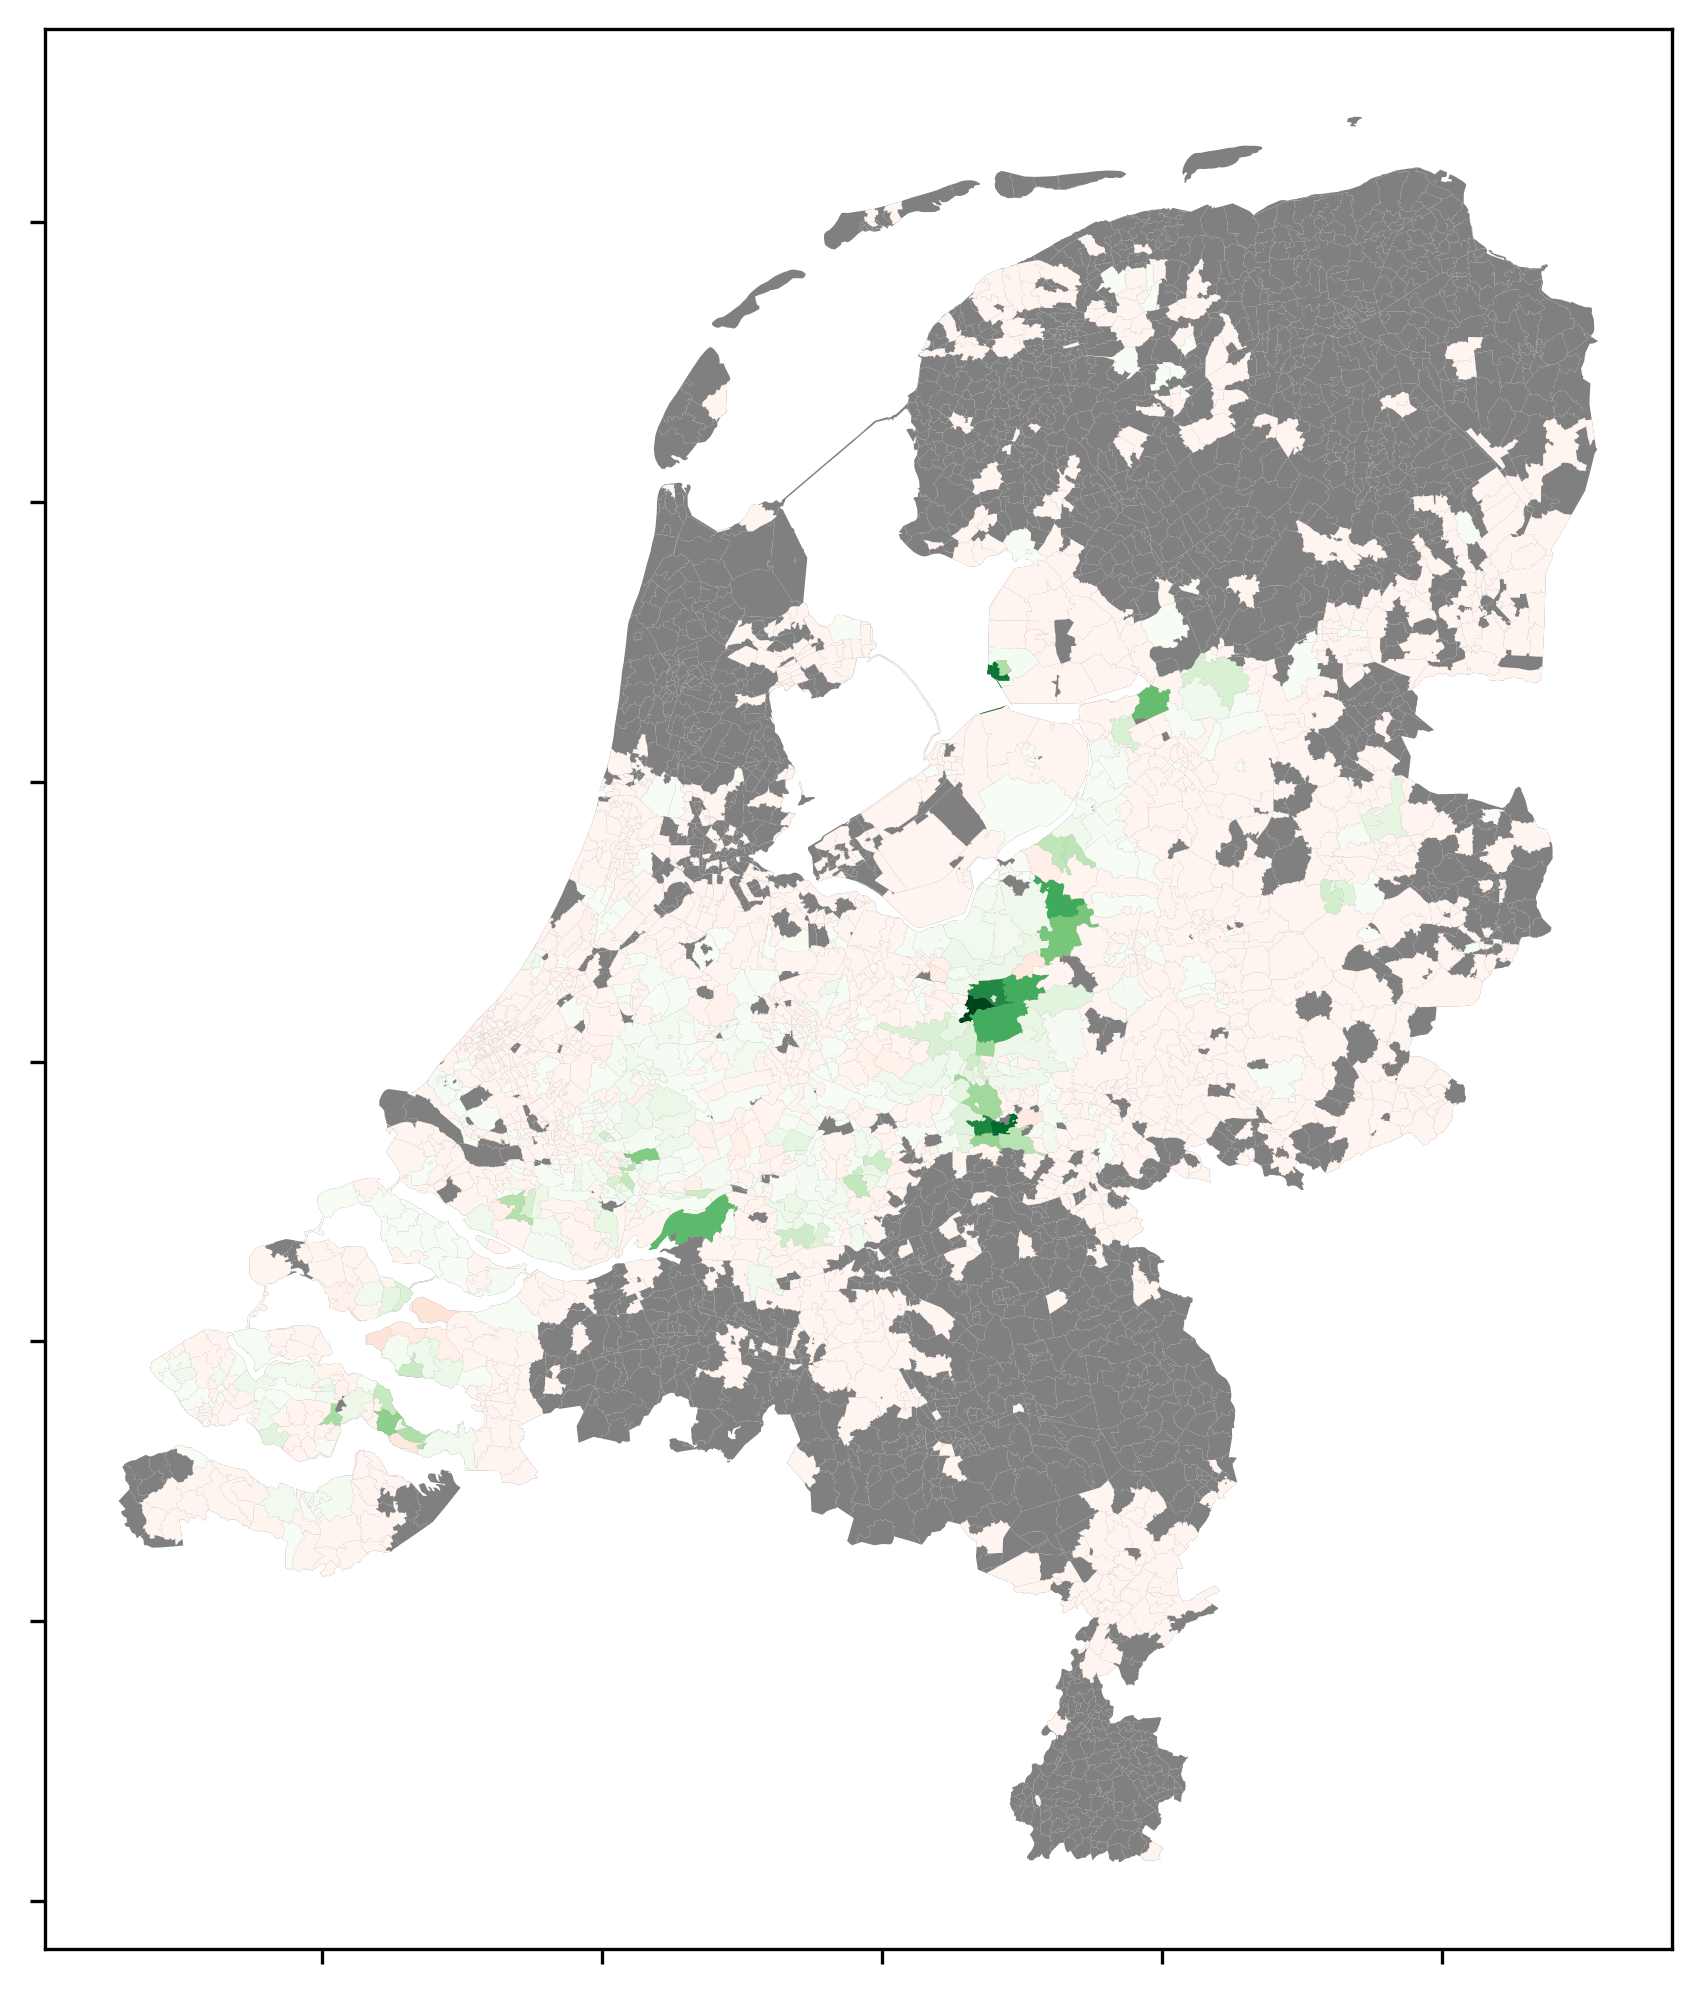

In [97]:
PC_Cases_NS, pc4shapes_NS = plot_resmap(loaded_cons, loaded_seeds)

/Users/LAPT0084/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:43: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/Users/LAPT0084/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:47: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/Users/LAPT0084/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:51: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
plotting.py:704: RuntimeWarning: divide by zero encount

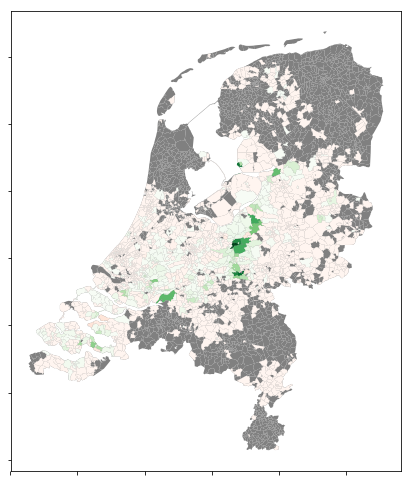

In [25]:
PC_Cases_NS, pc4shapes_NS = plot_resmap(loaded_cons, loaded_seeds)



/Users/jmunday/miniconda3/envs/Measles_NL/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jmunday/miniconda3/envs/Measles_NL/lib/python3.9/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/jmunday/miniconda3/envs/Measles_NL/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jmunday/miniconda3/envs/Measles_NL/lib/python3.9/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

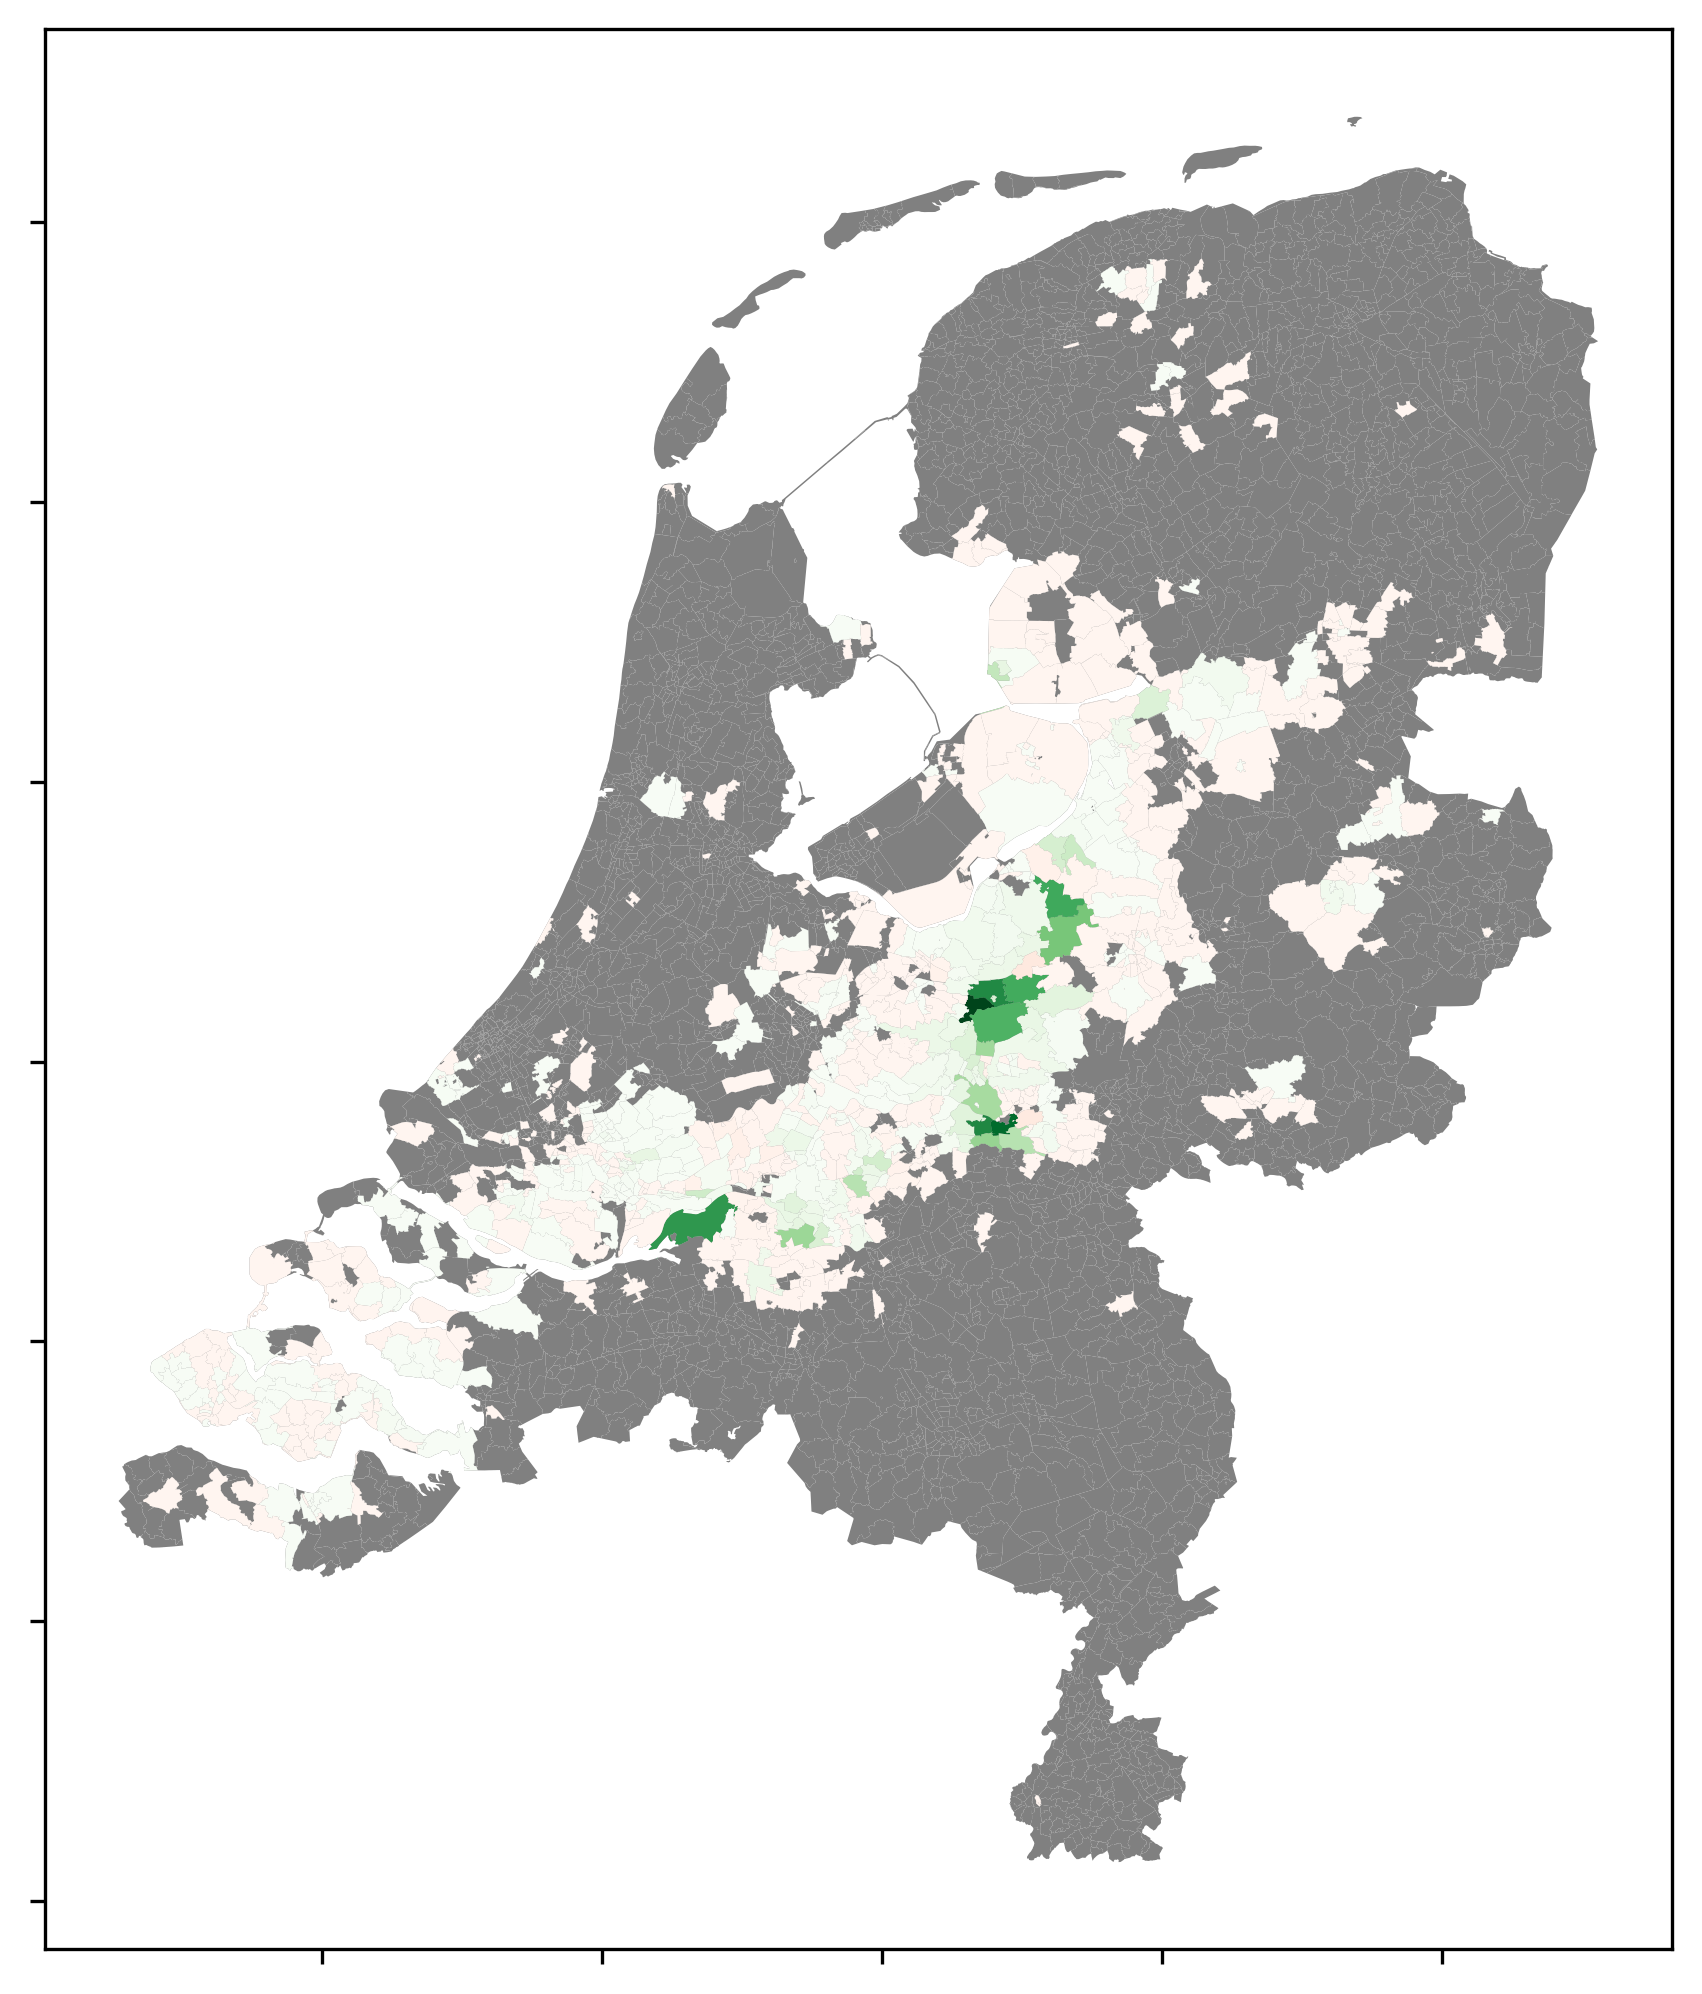

In [98]:
PC_Cases_NP, pc4shapes_NP = plot_resmap(loaded_cons_pc4, loaded_seeds_pc4)

/Users/LAPT0084/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:43: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/Users/LAPT0084/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:47: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/Users/LAPT0084/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:51: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


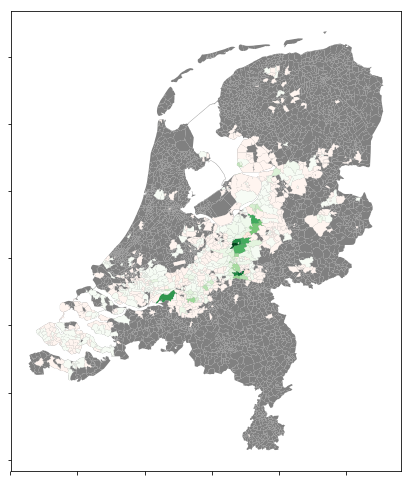

In [26]:
PC_Cases_NP, pc4shapes_NP = plot_resmap(loaded_cons_pc4, loaded_seeds_pc4)

/var/folders/1p/9vqy63ms31n2xbfhkrvfq9qr0000gs/T/ipykernel_86430/301408337.py:61: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  schools_pc4_cases['cases_' + str(run)] = schools_pc4_cases['run ' + str(run)] * schools_pc4_cases.TOTAAL * schools_pc4_cases.fs
/var/folders/1p/9vqy63ms31n2xbfhkrvfq9qr0000gs/T/ipykernel_86430/301408337.py:61: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  schools_pc4_cases['cases_' + str(run)] = schools_pc4_cases['run ' + str(run)] * schools_pc4_cases.TOTAAL * schools_pc4_cases.fs
/var/folders/1p/9vqy63

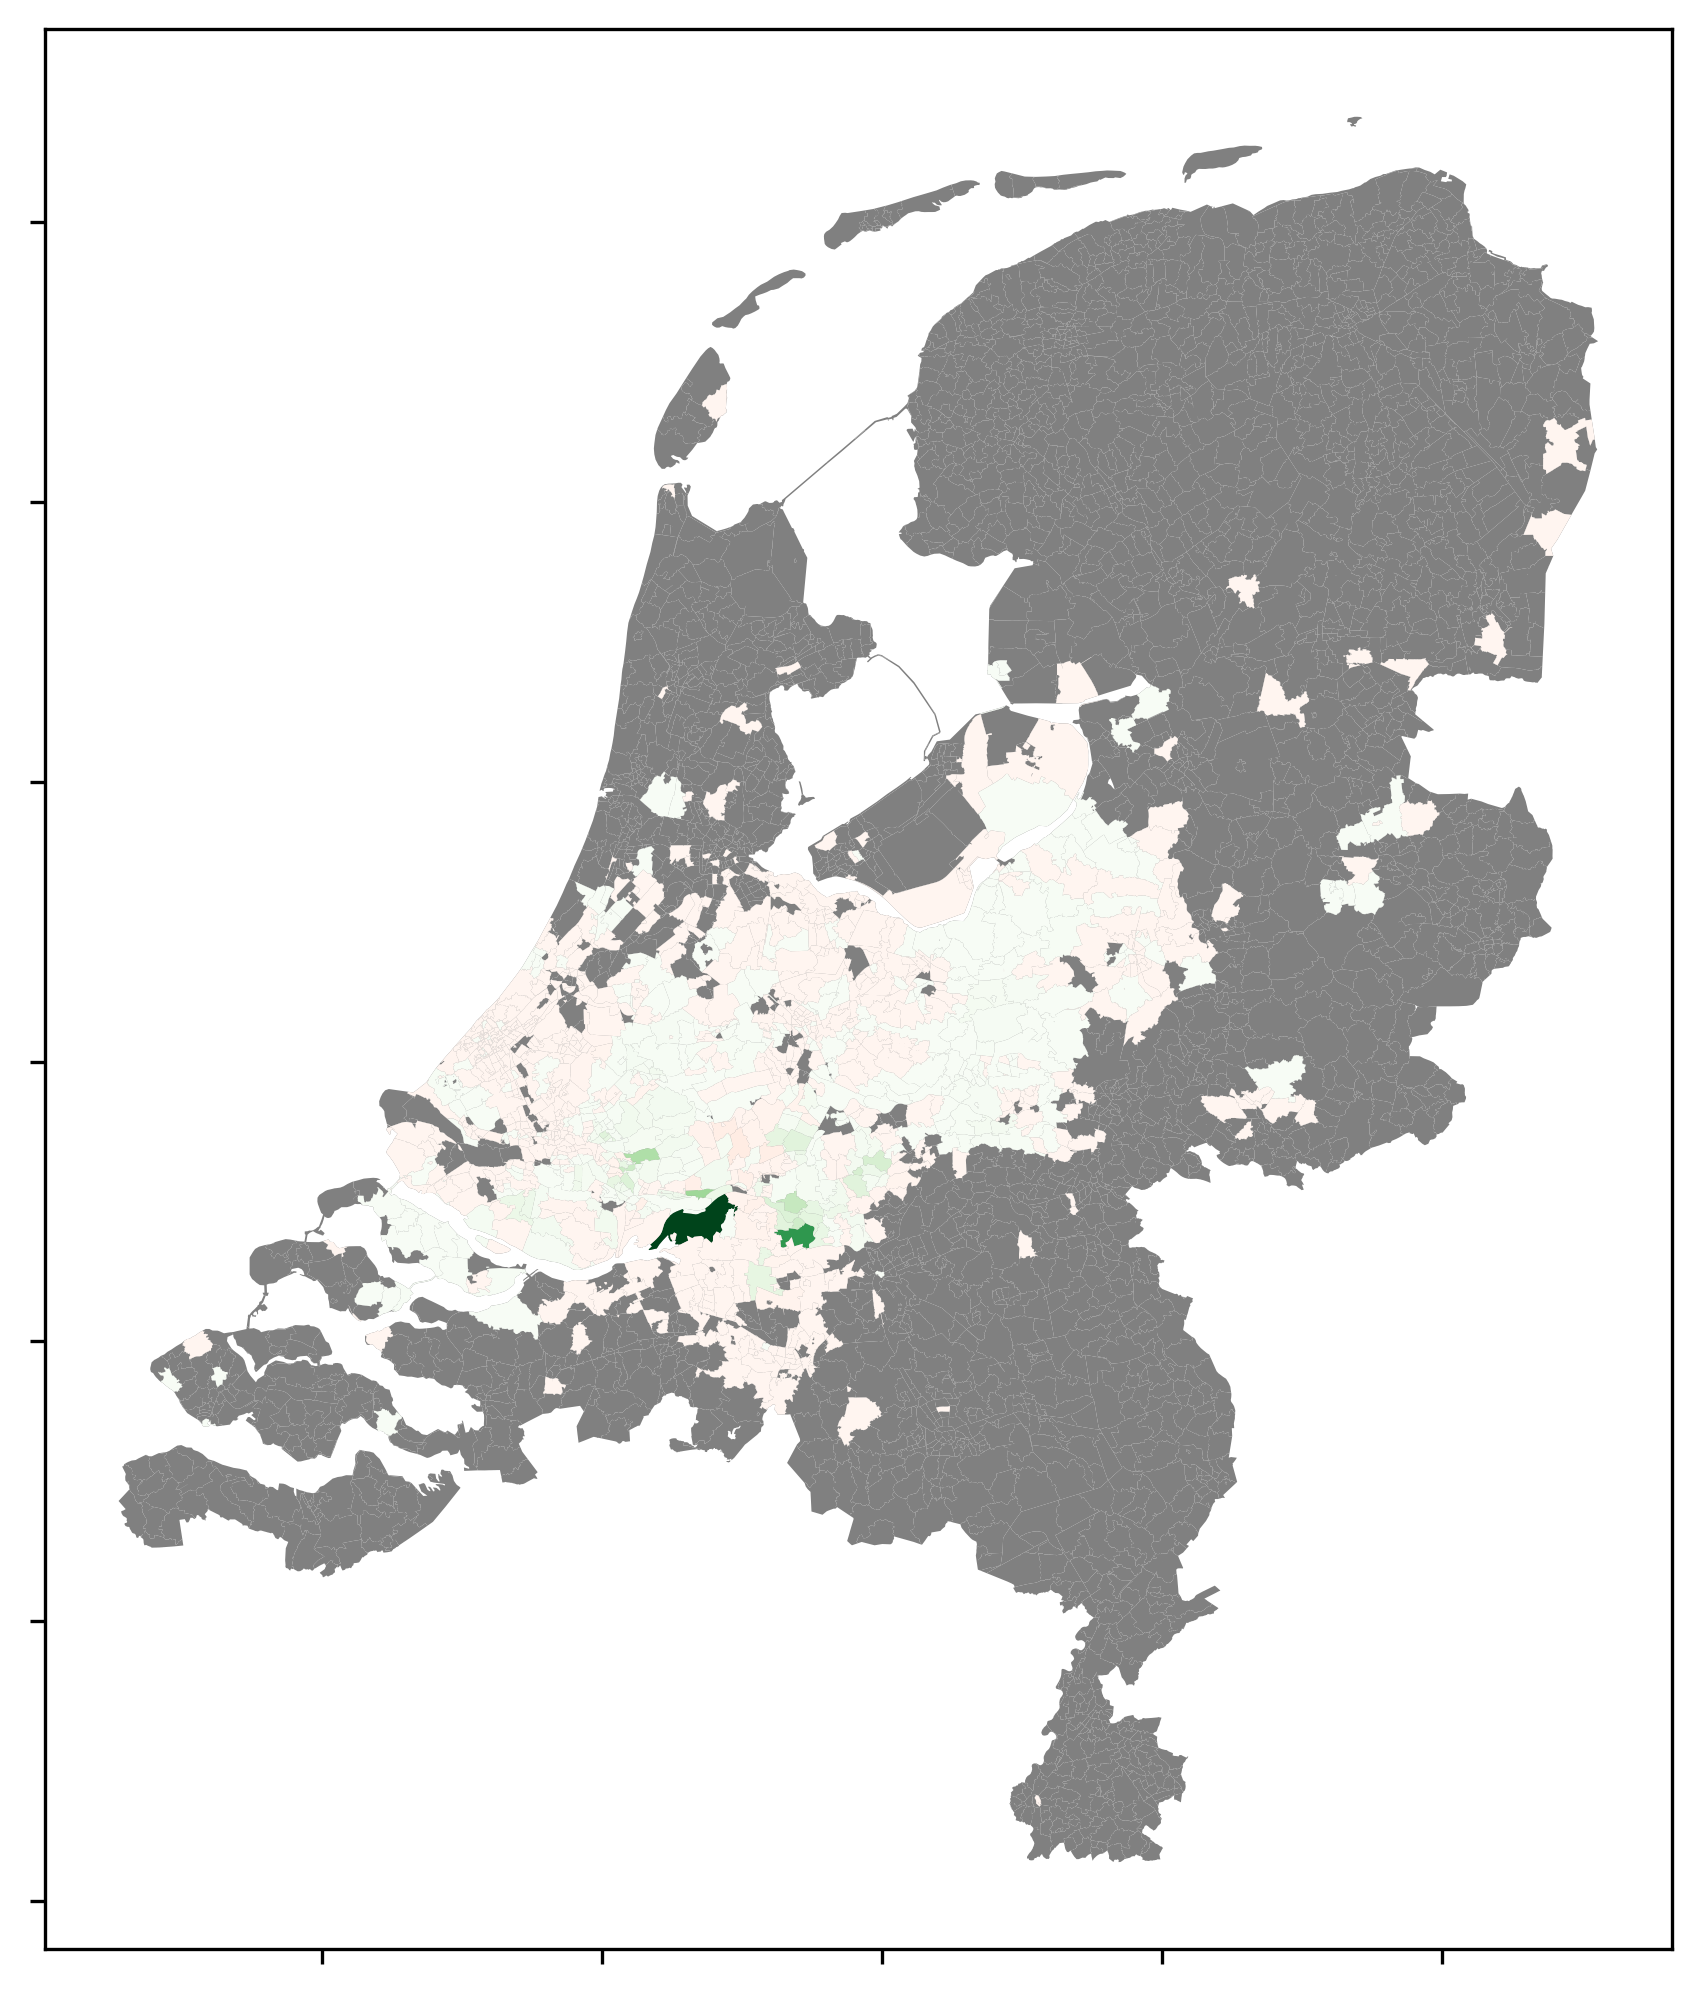

In [99]:
PC_Cases_SS, pc4shapes_SS = plot_resmap(spatial_cons, spatial_seeds)

/Users/LAPT0084/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:43: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/Users/LAPT0084/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:47: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/Users/LAPT0084/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:51: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


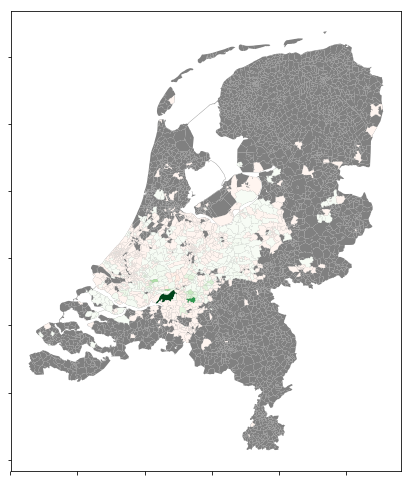

In [32]:
PC_Cases_SS, pc4shapes_SS = plot_resmap(spatial_cons, spatial_seeds)

In [100]:
PC_Cases_SP, pc4shapes_SP = plot_resmap(spatial_cons_pc4, spatial_seeds_pc4)

ValueError: Empty data passed with indices specified.

/Users/LAPT0084/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:43: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/Users/LAPT0084/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:47: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/Users/LAPT0084/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:51: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


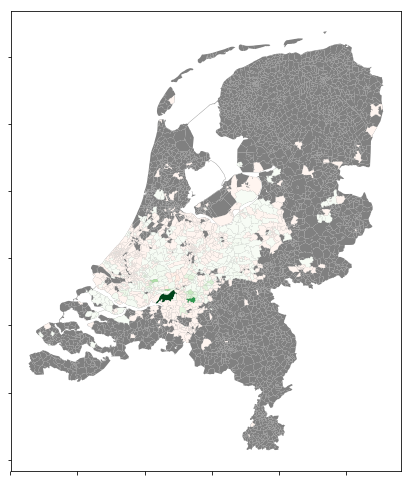

In [32]:
PC_Cases_SS, pc4shapes_SS = plot_resmap(spatial_cons, spatial_seeds)

In [101]:
rocs_SS = pl.roc_values_weighted(PC_Cases_SS,935)
ssvals_SS = np.array(rocs_SS)[:,[0,2]].T

rocs_NP = pl.roc_values_weighted(PC_Cases_NP,87)
ssvals_NP = np.array(rocs_NP)[:,[0,2]].T

rocs_NS = pl.roc_values_weighted(PC_Cases_NS,1000)
ssvals_NS = np.array(rocs_NS)[:,[0,2]].T

In [102]:
rocsuw_SS = pl.roc_values(PC_Cases_SS,0,935 )
ssvalsuw_SS = np.array(rocsuw_SS)[:,[0,2]].T

rocsuw_NP = pl.roc_values(PC_Cases_NP,0,87)
ssvalsuw_NP = np.array(rocsuw_NP)[:,[0,2]].T

rocsuw_NS = pl.roc_values(PC_Cases_NS,0,1000)
ssvalsuw_NS = np.array(rocsuw_NS)[:,[0,2]].T

([<matplotlib.axis.XTick at 0x3a01e8430>,
 [Text(0.6, 0, '0.6'), Text(0.8, 0, '0.8'), Text(1.0, 0, '1.0')])

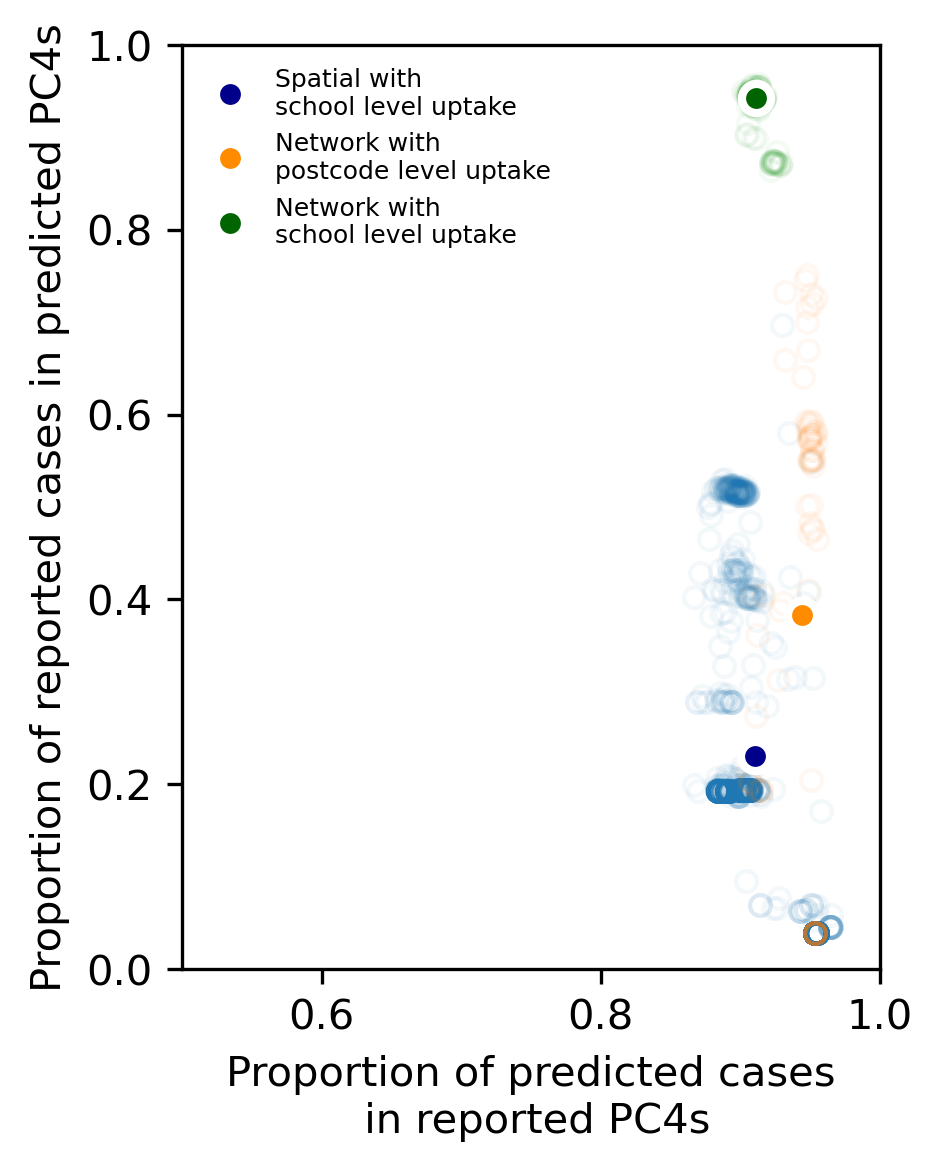

In [103]:
fig = plt.figure(figsize=[3,4], dpi=300)
ax = fig.add_subplot(111)
ax.plot(ssvals_SS[1], ssvals_SS[0], 'o', ms=5, alpha=0.05, mfc='none', label=None)
ax.plot(ssvals_NP[1], ssvals_NP[0], 'o', ms=5, alpha=0.05, mfc='none', label=None)
ax.plot(ssvals_NS[1], ssvals_NS[0], 'o', ms=5, alpha=0.05, mfc='none', label=None)


ax.plot(np.mean(ssvals_SS[1]), np.mean(ssvals_SS[0]), 'o', ms=7, alpha=1, mec='white', mew=2, mfc='DarkBlue', label="Spatial with \nschool level uptake")
ax.plot(np.mean(ssvals_NP[1]), np.mean(ssvals_NP[0]), 'o', ms=7, alpha=1, mec='white', mew=2, mfc='DarkOrange', label="Network with \npostcode level uptake")
ax.plot(np.mean(ssvals_NS[1]), np.mean(ssvals_NS[0]), 'o', ms=7, alpha=1, mec='white', mew=2, mfc='DarkGreen', label="Network with \nschool level uptake")



ax.legend(loc = 2, fontsize=6, frameon=False)

plt.ylabel('Proportion of reported cases in predicted PC4s')
plt.xlabel('Proportion of predicted cases\n in reported PC4s')


plt.xlim([0.5,1])
plt.ylim([0,1])
plt.xticks(np.arange(0.6,1.2, 0.2))

([<matplotlib.axis.XTick at 0x1bd44be490>,
 <a list of 3 Text xticklabel objects>)

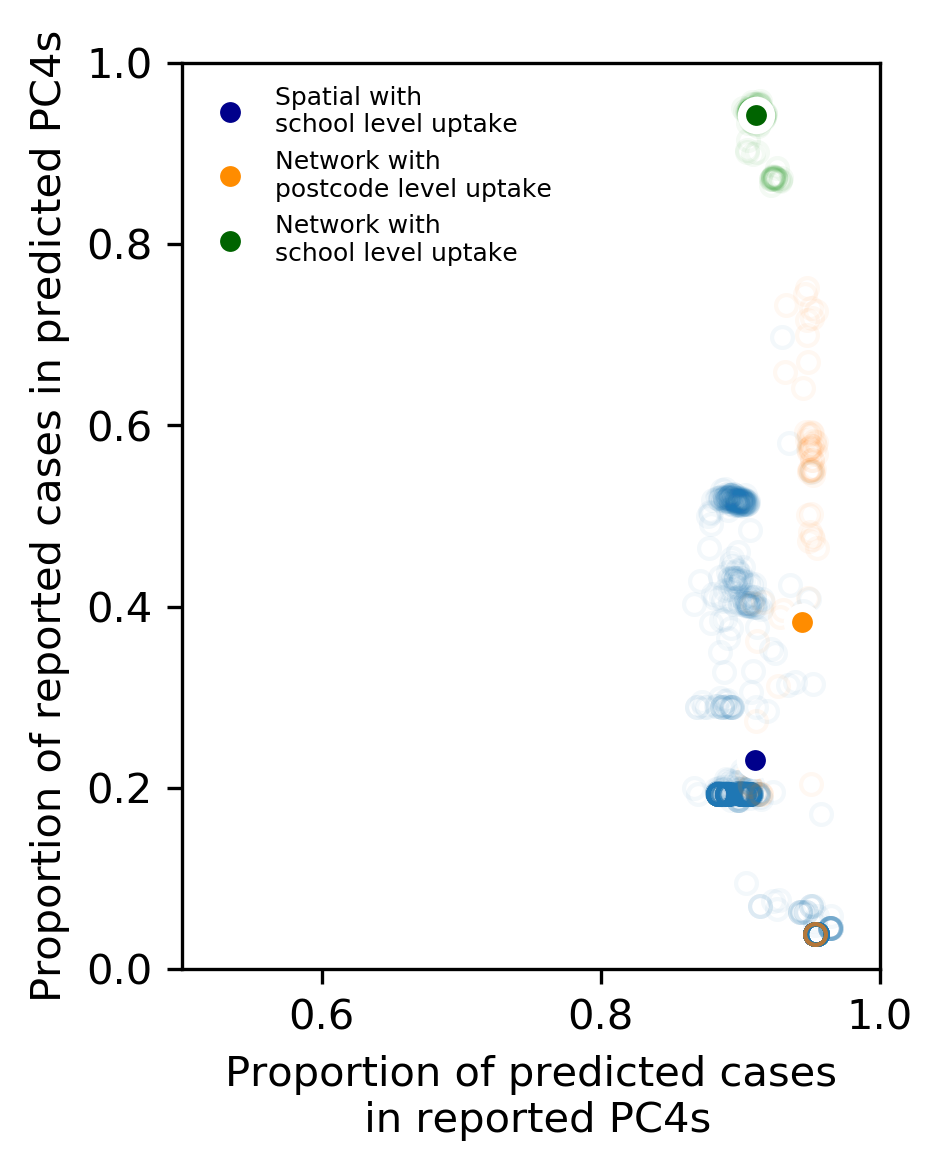

In [56]:
fig = plt.figure(figsize=[3,4], dpi=300)
ax = fig.add_subplot(111)
ax.plot(ssvals_SS[1], ssvals_SS[0], 'o', ms=5, alpha=0.05, mfc='none', label=None)
ax.plot(ssvals_NP[1], ssvals_NP[0], 'o', ms=5, alpha=0.05, mfc='none', label=None)
ax.plot(ssvals_NS[1], ssvals_NS[0], 'o', ms=5, alpha=0.05, mfc='none', label=None)


ax.plot(np.mean(ssvals_SS[1]), np.mean(ssvals_SS[0]), 'o', ms=7, alpha=1, mec='white', mew=2, mfc='DarkBlue', label="Spatial with \nschool level uptake")
ax.plot(np.mean(ssvals_NP[1]), np.mean(ssvals_NP[0]), 'o', ms=7, alpha=1, mec='white', mew=2, mfc='DarkOrange', label="Network with \npostcode level uptake")
ax.plot(np.mean(ssvals_NS[1]), np.mean(ssvals_NS[0]), 'o', ms=7, alpha=1, mec='white', mew=2, mfc='DarkGreen', label="Network with \nschool level uptake")



ax.legend(loc = 2, fontsize=6, frameon=False)

plt.ylabel('Proportion of reported cases in predicted PC4s')
plt.xlabel('Proportion of predicted cases\n in reported PC4s')


plt.xlim([0.5,1])
plt.ylim([0,1])
plt.xticks(np.arange(0.6,1.2, 0.2))

In [42]:
leg = ax.get_legend()

([<matplotlib.axis.XTick at 0x398534790>,
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

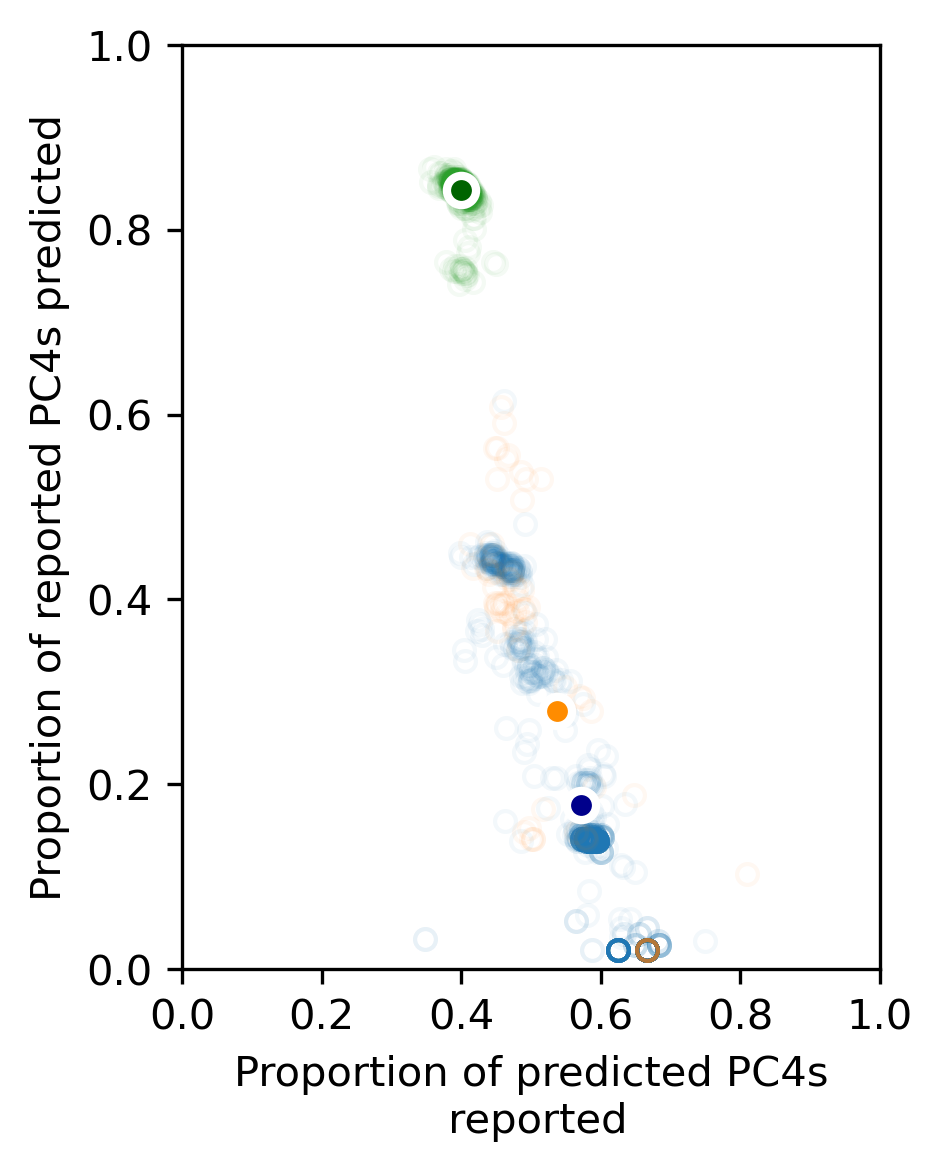

In [104]:
fig = plt.figure(figsize=[3,4], dpi=300)
plt.plot(ssvalsuw_SS[1], ssvalsuw_SS[0], 'o', ms=5, alpha=0.05, mfc='none')
plt.plot(ssvalsuw_NP[1], ssvalsuw_NP[0], 'o', ms=5, alpha=0.05, mfc='none')
plt.plot(ssvalsuw_NS[1], ssvalsuw_NS[0], 'o', ms=5, alpha=0.05, mfc='none')

plt.plot(np.mean(ssvalsuw_SS[1]), np.mean(ssvalsuw_SS[0]), 'o', ms=7, alpha=1, mec='white', mew=2, mfc='DarkBlue')
plt.plot(np.mean(ssvalsuw_NP[1]), np.mean(ssvalsuw_NP[0]), 'o', ms=7, alpha=1, mec='white', mew=2, mfc='DarkOrange')
plt.plot(np.mean(ssvalsuw_NS[1]), np.mean(ssvalsuw_NS[0]), 'o', ms=7, alpha=1, mec='white', mew=2, mfc='DarkGreen')


#plt.legend(['SS', 'NP', 
            #'NS', 'SS - mean', 
            #'NS - mean', 'NP - mean'])

plt.ylabel('Proportion of reported PC4s predicted')
plt.xlabel('Proportion of predicted PC4s\n reported')





plt.xlim([0.,1])
plt.ylim([0,1])
plt.xticks(np.arange(0,1.2, 0.2))

([<matplotlib.axis.XTick at 0x1bc969a890>,
 <a list of 6 Text xticklabel objects>)

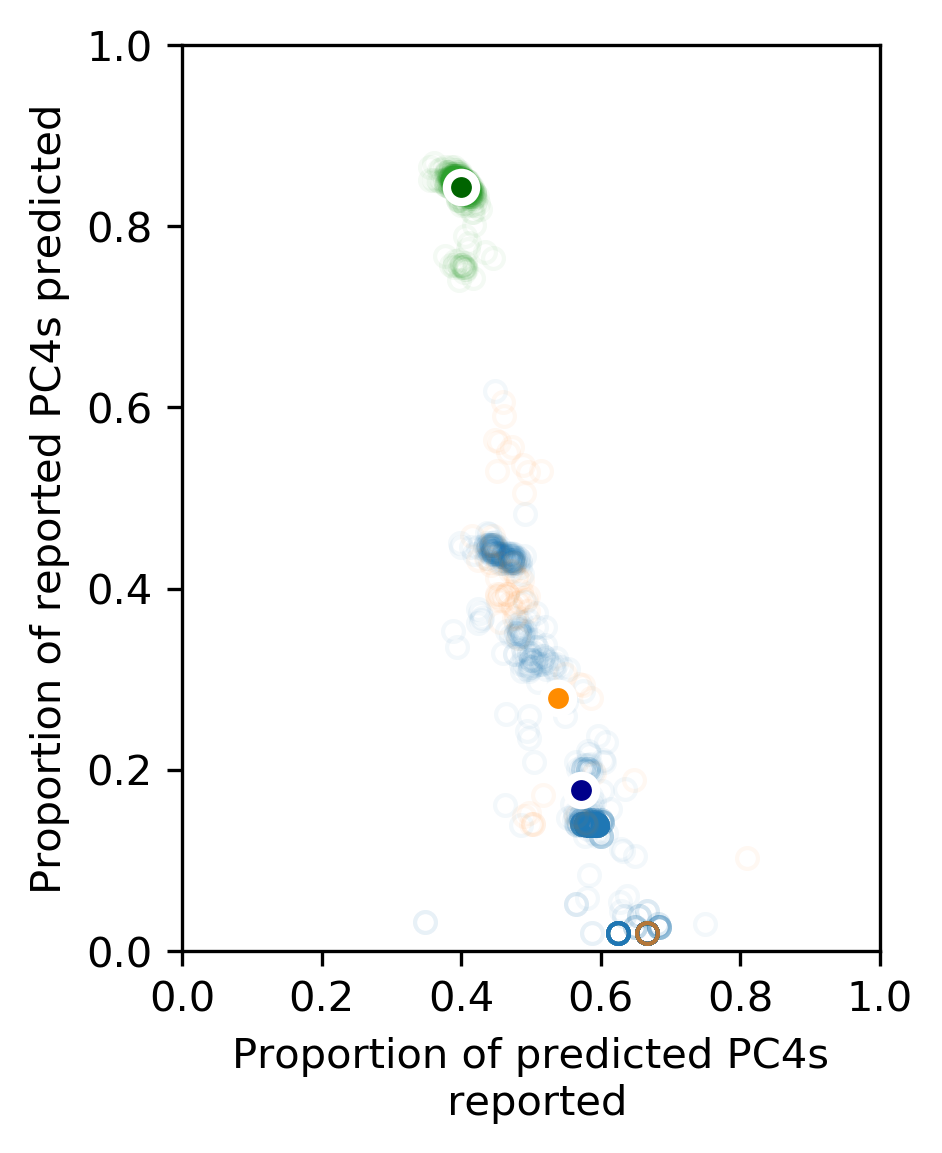

In [37]:
fig = plt.figure(figsize=[3,4], dpi=300)
plt.plot(ssvalsuw_SS[1], ssvalsuw_SS[0], 'o', ms=5, alpha=0.05, mfc='none')
plt.plot(ssvalsuw_NP[1], ssvalsuw_NP[0], 'o', ms=5, alpha=0.05, mfc='none')
plt.plot(ssvalsuw_NS[1], ssvalsuw_NS[0], 'o', ms=5, alpha=0.05, mfc='none')

plt.plot(np.mean(ssvalsuw_SS[1]), np.mean(ssvalsuw_SS[0]), 'o', ms=7, alpha=1, mec='white', mew=2, mfc='DarkBlue')
plt.plot(np.mean(ssvalsuw_NP[1]), np.mean(ssvalsuw_NP[0]), 'o', ms=7, alpha=1, mec='white', mew=2, mfc='DarkOrange')
plt.plot(np.mean(ssvalsuw_NS[1]), np.mean(ssvalsuw_NS[0]), 'o', ms=7, alpha=1, mec='white', mew=2, mfc='DarkGreen')


#plt.legend(['SS', 'NP', 
            #'NS', 'SS - mean', 
            #'NS - mean', 'NP - mean'])

plt.ylabel('Proportion of reported PC4s predicted')
plt.xlabel('Proportion of predicted PC4s\n reported')





plt.xlim([0.,1])
plt.ylim([0,1])
plt.xticks(np.arange(0,1.2, 0.2))